<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PyOD_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Using PyOD for outlier detection 


In [3]:
pip install pyod

     |████████████████████████████████| 111 kB 4.1 MB/s 
  Created wheel for pyod: filename=pyod-0.9.3-py3-none-any.whl size=130719 sha256=ff1b839b9c41dae92607f807e8a1dd1493aa462cbd1852f0f74eacbe972fe604
  Stored in directory: /root/.cache/pip/wheels/ac/94/65/d29b87d4ad6defcec32686063e9bbaf5907a259eb2d8342174
Successfully built pyod


In [4]:
 #use of PyOD on a randomly generated dataset

In [6]:
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.font_manager 

In [7]:
from pyod.models.abod import ABOD #(angle based outlier detection)
from pyod.models.cblof import CBLOF# cluster based
from pyod.models.hbos import HBOS #histogram based 

In [8]:
from pyod.utils.data import generate_data, get_outliers_inliers

In [9]:
#generate the data 
X_train,Y_train = generate_data(n_train=200,train_only=True)

In [10]:
outlier_fraction =0.1

In [11]:
#separate the inliers and outliers
x_outliers, x_inliers=get_outliers_inliers(X_train,Y_train)

In [13]:
print(x_outliers.shape,x_inliers.shape)

(20, 2) (180, 2)


In [14]:
n_inliers=len(x_inliers)
n_outliers=len(x_outliers)

Text(0, 0.5, 'F2')

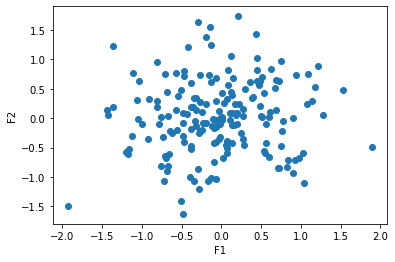

In [15]:
#visualise the dataset 
plt.scatter(X_train[:,[0]].reshape(-1,1),X_train[:,[1]].reshape(-1,1))
plt.xlabel('F1')
plt.ylabel('F2')

In [16]:
random_state=np.random.RandomState(21)
classifiers={
    'Angle Based Outlier Detection (ABOD)':ABOD(contamination=outlier_fraction),
    'Custer Based Outlier Factor (CBLOF)': CBLOF(contamination=outlier_fraction, check_estimator=False,random_state=random_state),
    'Histogram Based Outlier Detection (HBOS)': HBOS(contamination=outlier_fraction)
}

In [18]:
xx,yy=np.meshgrid(np.linspace(-10,10,200),np.linspace(-10,10,200))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-pa

No. of errors :  Angle Based Outlier Detection (ABOD) 20
No. of errors :  Custer Based Outlier Factor (CBLOF) 40
No. of errors :  Histogram Based Outlier Detection (HBOS) 37


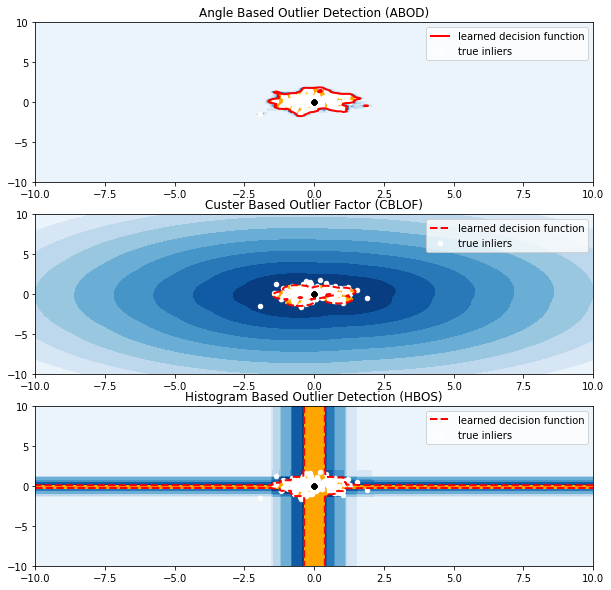

In [21]:
#set the figure size

plt.figure(figsize=(10,10))



for i, (clf_name,clf) in enumerate(classifiers.items()):

  #fit the model

  clf.fit(X_train)



  #predict the score

  scores_pred = clf.decision_function(X_train)*-1



  #predict whether a datapoint is an outlier or inlier

  y_pred = clf.predict(X_train)



  #no. of errors

  n_errors = (y_pred !=Y_train).sum()

  print('No. of errors : ', clf_name, n_errors)



  #drawing the scatter plots and visualizing the outliers and inliers

  #setting the threshold

  threshold = stats.scoreatpercentile(scores_pred, 100*outlier_fraction)



  Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])*-1

  Z=Z.reshape(xx.shape)



  subplot = plt.subplot(3,1,i+1)



  subplot.contourf(xx,yy,Z, levels=np.linspace(Z.min(), threshold,10), cmap=plt.cm.Blues)



  a=subplot.contour(xx,yy,Z,levels=[threshold], linewidths=2,colors='red')



  subplot.contourf(xx,yy, Z, levels=[threshold, Z.max()], colors='orange')



  b=subplot.scatter(X_train[:-n_outliers,0], X_train[:-n_outliers,1], c='white',s=20)



  c=subplot.scatter(X_train[-n_outliers:,0], X_train[-n_outliers:,1], c='black',s=20)



  subplot.axis('tight')



  subplot.legend([a.collections[0],b,c],['learned decision function', 'true inliers',], 

                 prop=matplotlib.font_manager.FontProperties(size=10))

  

  subplot.set_title(clf_name)

  subplot.set_xlim((-10,10))

  subplot.set_ylim((-10,10))